In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [3]:
data=pd.read_excel('.\PDH_Dataset.xlsx')

In [4]:
data.head()

,催化剂编号,催化剂源自的文章,金属1,金属1（实际）,金属1占比（质量）,金属2,金属2（实际）,金属2占比（质量）,金属3,金属3（实际）,...,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),丙烷转化率,丙烯选择性,丙烷转化率（初始）,丙烷转化率（最终）,Y
0,2.0,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.42,Sn,Sn,0.9,K,K,...,24.0,NaN,NaN,76.0,1.7,48.0,96.0,70.0,48.0,0.4608
1,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.42,Sn,Sn,0.9,K,K,...,24.0,NaN,NaN,76.0,1.7,48.0,97.0,NaN,NaN,0.4656
2,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.42,Sn,Sn,0.9,K,K,...,24.0,NaN,NaN,76.0,1.7,43.0,96.0,NaN,NaN,0.4128
3,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,76.0,1.7,4.0,58.0,NaN,NaN,0.0232
4,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,76.0,1.7,5.0,62.0,NaN,NaN,0.0310


In [5]:
X=data['丙烷转化率']
S=data['丙烯选择性']
d=pd.DataFrame({'X':X,'S':S})

In [6]:
data=pd.concat([data.loc[:,'金属1':'WHSV(流量)'],data.loc[:,'Y']],axis=1)
data

,金属1,金属1（实际）,金属1占比（质量）,金属2,金属2（实际）,金属2占比（质量）,金属3,金属3（实际）,金属3占比（质量）,金属4,...,非H2,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,Pt,Pt,0.42,Sn,Sn,0.9,K,K,0.65,NaN,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,Pt,0.42,Sn,Sn,0.9,K,K,0.65,NaN,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,Pt,0.42,Sn,Sn,0.9,K,K,0.65,NaN,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [7]:
data=data.drop(['金属1','金属2','金属3','金属4'],axis=1)

In [8]:
data

,金属1（实际）,金属1占比（质量）,金属2（实际）,金属2占比（质量）,金属3（实际）,金属3占比（质量）,金属4（实际）,金属4占比（质量）,负载1,负载占比,...,非H2,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [9]:
data1 = list(set(pd.concat([data.iloc[:, 0], data.iloc[:, 2], data.iloc[:, 4], data.iloc[:, 6]])))

In [10]:
len(data1)

14

In [70]:
data_1 = pd.DataFrame(np.zeros((589, 14)), columns=data1)

In [71]:
data_1

,Cr,NaN,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,Na,Sn,Ga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
num_1 = 0
for i in data.iloc[:, 0]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 1]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 2]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 3]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 4]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 5]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 6]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 7]
        num_1 = num_1 + 1
data_1 = data_1.dropna(axis=1)

In [73]:
data_1

,Cr,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,Na,Sn,Ga
0,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.9,0.0
1,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.9,0.0
2,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.9,0.0
3,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,3.0
585,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,3.0
586,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,3.0
587,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [74]:
data

,金属1（实际）,金属1占比（质量）,金属2（实际）,金属2占比（质量）,金属3（实际）,金属3占比（质量）,金属4（实际）,金属4占比（质量）,负载1,负载占比,...,非H2,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [75]:
data_use=pd.concat([data_1,data.loc[:,'负载1':'Y']],axis=1)

In [76]:
data_use

,Cr,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,...,非H2,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [77]:
data_use.to_excel('use.xlsx')

In [78]:
data

,金属1（实际）,金属1占比（质量）,金属2（实际）,金属2占比（质量）,金属3（实际）,金属3占比（质量）,金属4（实际）,金属4占比（质量）,负载1,负载占比,...,非H2,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [79]:
data2 = list(set(pd.concat([data.iloc[:, 8], data.iloc[:, 10]])))

In [80]:
len(data2)

21

In [81]:
data_2 = pd.DataFrame(np.zeros((589, 21)), columns=data2)

In [82]:
num_1 = 0
for i in data.iloc[:, 8]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 9]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 10]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 11]
        num_1 = num_1 + 1
data_2 = data_2.dropna(axis=1)

In [83]:
data_2

,Beta,Mg（Al）O,Mg,ZrO2,Mg（Sn）（Al）O,SiBeta,Sn,SBA-15,MCM-41,S-1,SiO2,Zn,MFI,CMK-3,HZSM-5,MgO,AlSBA-15,ZSM-5,SBA-1,Al2O3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.03,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.03,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.03,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.60,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.60,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,96.65
585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,96.65
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,96.65
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,96.65


In [84]:
data_use=pd.concat([data_1,data_2,data.loc[:,'温度(_摄氏度)':'Y']],axis=1)

In [85]:
data_use

,Cr,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,...,Al2O3,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [86]:
data_use['循环']=data_use['循环'].fillna(1)

In [87]:
data_use

,Cr,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,...,Al2O3,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [88]:
# 可选择删除循环
# data_use.drop(['循环'],axis=1,inplace=True)
# data_use

In [89]:
data_use['时间(h)'].fillna(data_use['时间(h)'].mean(),inplace=True)

c:\Users\Lenovo\anaconda3\envs\pytorch\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [90]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cr           589 non-null    float64
 1   Zr           589 non-null    float64
 2   Pt           589 non-null    float64
 3   In           589 non-null    float64
 4   Zn           589 non-null    float64
 5   K            589 non-null    float64
 6   Co           589 non-null    float64
 7   Mg           589 non-null    float64
 8   Ni           589 non-null    float64
 9   V            589 non-null    float64
 10  Na           589 non-null    float64
 11  Sn           589 non-null    float64
 12  Ga           589 non-null    float64
 13  Beta         589 non-null    float64
 14  Mg（Al）O      589 non-null    float64
 15  Mg           589 non-null    float64
 16  ZrO2         589 non-null    float64
 17  Mg（Sn）（Al）O  589 non-null    float64
 18  SiBeta       589 non-null    float64
 19  Sn      

In [91]:
data_use['WHSV(流量)'].fillna(data_use['WHSV(流量)'].mean(),inplace=True)

In [92]:
data_use.fillna('0',inplace=True)
data_use

,Cr,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,...,Al2O3,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y
0,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,65.0,1.0,24.0,0,0,76.0,1.7,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,38.0,2.0,24.0,0,0,76.0,1.7,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.65,0.0,0.0,0.0,0.0,...,0.00,600,58.0,3.0,24.0,0,0,76.0,1.7,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,600,12.0,1.0,24.0,0,0,76.0,1.7,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,600,14.0,2.0,24.0,0,0,76.0,1.7,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,4.0,100.0,0,0,0,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,5.0,100.0,0,0,0,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,6.0,100.0,0,0,0,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,96.65,620,0.25,7.0,100.0,0,0,0,6.47,0.3572


In [93]:
# data_3=data_use.replace(0,np.nan)
# data_3

In [94]:
# data_3.info()

In [95]:
data_use.to_excel('./use.xlsx')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


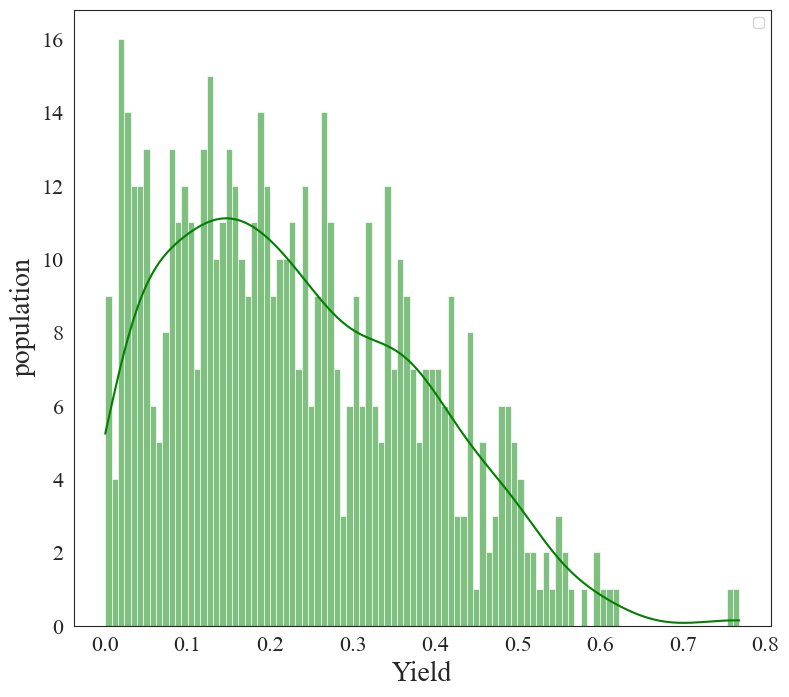

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_style("white")
plt.figure(figsize=(9,8))
sns.histplot(data_use['Y'],color='g',bins=100,kde=True)
plt.xlabel('Yield',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('population',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.legend()
plt.show()

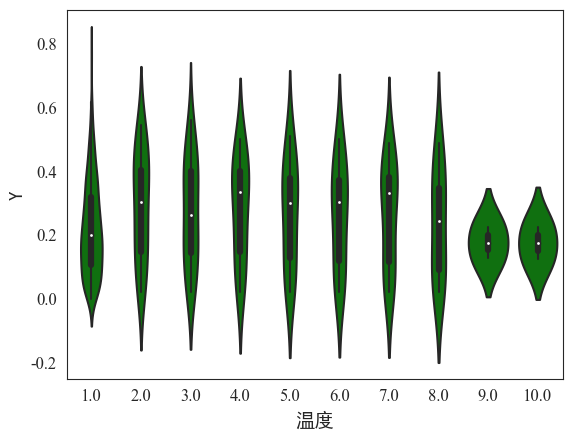

In [97]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.violinplot(x="循环",y="Y",data=data_use,color='g')
plt.xlabel('循环',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()

NameError: name 'feat' is not defined

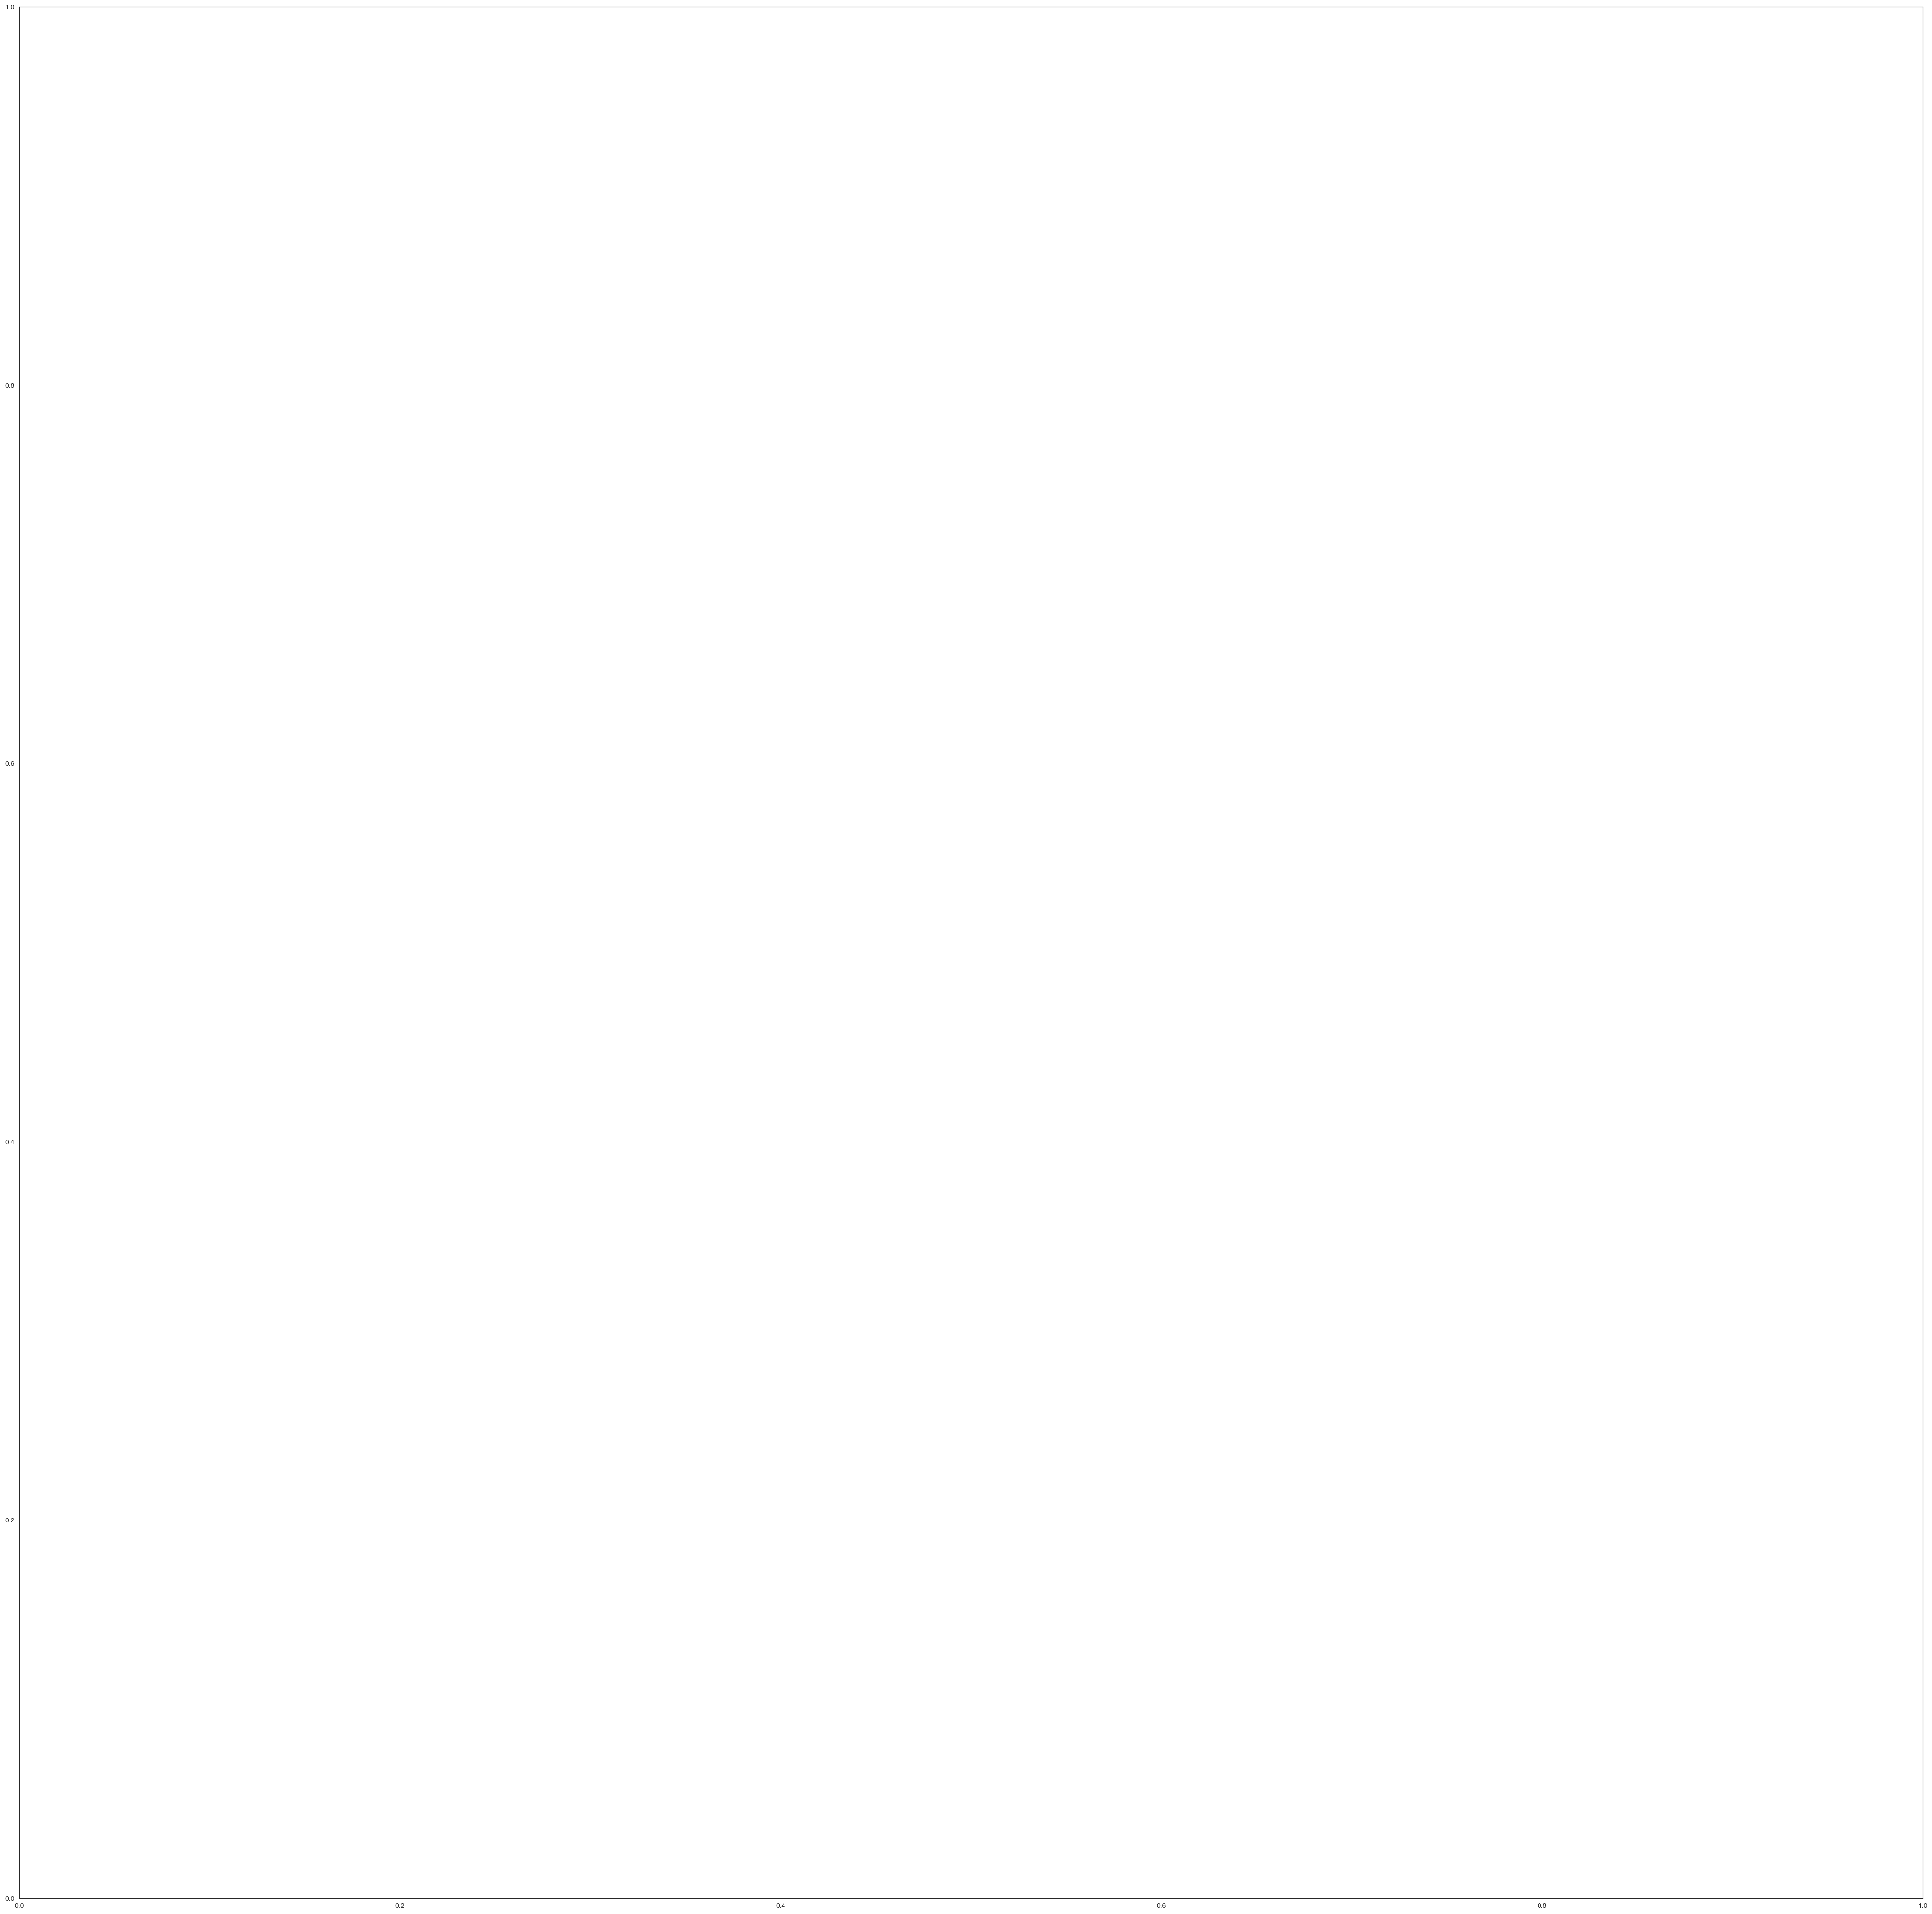

In [100]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(feat.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()